hello


0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

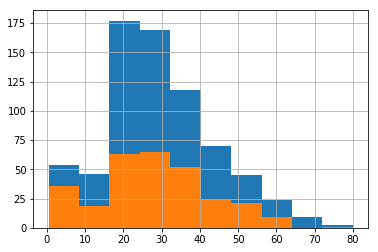

In [58]:
%matplotlib inline
import pandas as pd


df = pd.read_csv("train.csv")
df.columns
df.dtypes
df.describe()
df.count()

df["Age"].hist()
df[df["Survived"] == 1] # On récupère que ceux qui ont survécu
df[df["Survived"] == 1]["Age"].hist()
print("hello")

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})


In [55]:
# len(df[(df["Survived"] == 1) & ()])
total = len(df)
# proportion de femmes
p_f = len(df[(df["Sex"] == "female")]) / total
# proportion d'hommes
p_h = len(df[(df["Sex"] == "male")]) / total
# proportion de femmes qui survivent
p_fs = len(df[(df["Sex"] == "female") & (df["Survived"] == 1)]) / len(df[(df["Sex"] == "female")])
# proportion d'hommes qui survivent
p_hs = len(df[(df["Sex"] == "male") & (df["Survived"] == 1)]) / len(df[(df["Sex"] == "male")])
# len(df["Sex"].dropna())

print(f"""
    Proportion de femmes : {p_f}
    Proportion d'hommes : {p_h}
    Proportion de femmes qui survivent : {p_fs}
    Proportion d'hommes qui survivent : {p_hs}
""")


    Proportion de femmes : 0.35241301907968575
    Proportion d'hommes : 0.6475869809203143
    Proportion de femmes qui survivent : 0.7420382165605095
    Proportion d'hommes qui survivent : 0.18890814558058924



In [46]:
import pandas as pd

df = pd.read_csv("train.csv")
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
# df.groupby("Embarked").count()
df["Embarked"] = df["Embarked"].map({"S":0, "C": 1, "Q": 2})
df.drop(columns=["Cabin", "Ticket"], inplace=True)
df.dropna(inplace=True)

import re 

# chaine = "Cumings, Mrs. John Bradley (Florence Briggs Th"
# print(re.findall(", (.*)\.", chaine))

def extract_title(name):
    return re.findall(", ([^\.]*)\.", name)[0]

df["Title"] = df.Name.map(extract_title)
titles = list(df.Title.unique())
df.Title = df.Title.map(lambda t: titles.index(t))
df.drop(columns=["Name", "PassengerId"], inplace=True)

df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
Title         int64
dtype: object

In [63]:
df.Age = df.Age / df.Age.max()
df.Fare = df.Fare / df.Fare.max()
df.Title = df.Title / df.Title.max()
df.SibSp = df.SibSp / df.SibSp.max()
df.Pclass = df.Pclass / df.Pclass.max()
df.Embarked = df.Embarked / df.Embarked.max()
df.Parch = df.Parch / df.Parch.max()

df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,0.746723,0.363764,0.370526,0.102809,0.072097,0.067471,0.130618,0.063553
std,0.491139,0.278951,0.481420,0.181162,0.186138,0.142364,0.103329,0.260780,0.116156
min,0.000000,0.333333,0.000000,0.005250,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.333333,0.000000,0.250000,0.000000,0.000000,0.015713,0.000000,0.000000
50%,0.000000,0.666667,0.000000,0.350000,0.000000,0.000000,0.030539,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.475000,0.200000,0.166667,0.064412,0.000000,0.125000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


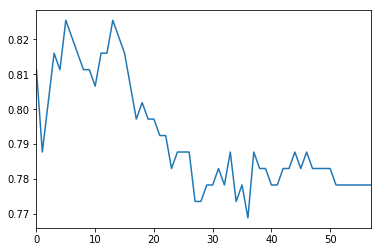

In [64]:
from sklearn.neighbors import KNeighborsClassifier

THRESH = 500
scores = []
for n in range(2,60):
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(df[:THRESH].drop(columns=["Survived"]), df[:THRESH]["Survived"])

    score = knn.score(df[THRESH:].drop(columns=["Survived"]), df[THRESH:]["Survived"])
#     print(f" n={n}, score={score}")
    scores.append(score)
    
scores = pd.Series(scores)
scores.plot()

In [66]:
df
moi = pd.DataFrame([{
    "Pclass": 3,
    "Sex": 0,
    "Age": 5 / 80,
    "SibSp": 0,
    "Parch": 2,
    "Fare": 8 / 512,
    "Embarked": 1,
    "Title": 0 / 16
}])
moi = moi[["Pclass","Sex","Age","SibSp", "Parch", "Fare", "Embarked","Title"]]
knn.predict(moi)

array([0], dtype=int64)

In [55]:
titles

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer']

In [75]:
from sklearn.svm import SVC

THRESH = 500

for c in [80, 100, 200]:
    svc = SVC(C=c)

    svc.fit(df[:THRESH].drop(columns=["Survived"]), df[:THRESH]["Survived"])

    score = svc.score(df[THRESH:].drop(columns=["Survived"]), df[THRESH:]["Survived"])
    print(f" n={c}, score={score}")



 n=80, score=0.8254716981132075
 n=100, score=0.8254716981132075
 n=200, score=0.8254716981132075


C:\Users\miguel\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miguel\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miguel\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [76]:
ma_liste = [1,4,3,7]
print(ma_liste)

[1, 4, 3, 7]
